In [2]:
#Initialization of modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize
from decimal import *
import decimal
import random

In [3]:
#cubic function
def x_3(x):
    return x**3

In [4]:
#function |x-0.2|
def module(x):
    return abs(x-0.2)

In [5]:
#function x*sin(1/x)
def trig(x):
    return x*np.sin(1/x)

In [6]:
#one-dimensional brute-force algorithm
def bruteforce(func,a,b):
    f=[]
    N=0
    for i in range(0,1000):
        x_now=a+i*(b-a)/1000
        f.append((x_now,func(x_now)))
        N=N+1
    return min(f, key = lambda t: t[1])[1],N,N

In [7]:
#dichotomy algorithm
def dichotomy(func,a,b):
    ak=a
    bk=b
    N_func=0
    N_iter=0
    delta = 0.001/2
    while abs(ak-bk)>0.001:
        N_iter=N_iter+1
        x1=(ak+bk-delta)/2
        x2=(ak+bk+delta)/2
        if (func(x1)<=func(x2)):
            bk=x2
            N_func=N_func+2
        else:
            ak=x1
            N_func=N_func+2
    return func((ak+bk)/2),N_iter,N_func 

In [8]:
#golden section algorithm
def golden(func,a,b):
    ak=a
    bk=b
    N_iter=0
    N_func=0
    while abs(ak-bk)>0.001:
        N_iter=N_iter+1
        if (N_iter==1):
            x1=ak+(3-np.sqrt(5))/2*(bk-ak)
            x2=bk+(np.sqrt(5)-3)/2*(bk-ak)
            if func(x1)<=func(x2):
                bk=x2
                x2=x1
                N_func=N_func+2
                i='l'
            else:
                ak=x1
                x1=x2
                N_func=N_func+2
                i='r'
        else:
            if (i=='r'):
                x2=bk+(np.sqrt(5)-3)/2*(bk-ak)
                if func(x1)<=func(x2):
                    bk=x2
                    x2=x1
                    N_func=N_func+1
                    i='l'
                else:
                    ak=x1
                    x1=x2
                    N_func=N_func+1
                    i='r'
            else:
                x1=ak+(-np.sqrt(5)+3)/2*(bk-ak)
                if func(x1)<=func(x2):
                    bk=x2
                    x2=x1
                    N_func=N_func+1
                    i='l'
                else:
                    ak=x1
                    x1=x2
                    N_func=N_func+1
                    i='r'
    return func((ak+bk)/2),N_iter,N_func

In [9]:
#application of brute-force method to functions 
print(bruteforce(x_3,0,1))
print(bruteforce(module,0,1))
print(bruteforce(trig,0.01,1))

(0.0, 1000, 1000)
(0.0, 1000, 1000)
(-0.2172296012912312, 1000, 1000)


In [10]:
#application of dichotomy method to functions
print(dichotomy(x_3,0,1))
print(dichotomy(module,0,1))
print(dichotomy(trig,0.01,1))

(1.2056736854538035e-10, 11, 22)
(0.0001011962890624385, 11, 22)
(-0.21723352556119732, 11, 22)


In [11]:
#application of golden section method to functions
print(golden(x_3,0,1))
print(golden(module,0,1))
print(golden(trig,0.01,1))

(4.9256800857728296e-11, 15, 16)
(7.331374358568454e-05, 15, 16)
(-0.21723232817753246, 15, 16)


In [22]:
#random generation of sample (x,y)
alpha=random.uniform(0,1)
beta=random.uniform(0,1)
x = np.array([k/101 for k in range(101)])
y = np.array([alpha * x[k] + beta + np.random.standard_normal(1) for k in range(101)])

[a,b] = [array([-0.13800701]), array([0.59098492])]


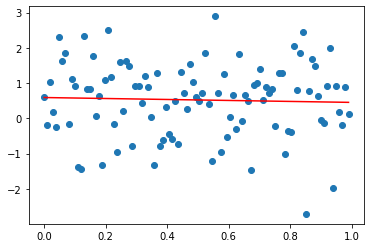

In [23]:
#determination of parameters for linear approximation using linalg
A1 = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A1, y, rcond=None)[0]

plt.scatter(x, y)
plt.plot(x, a*x+b, 'r')
print('[a,b] =',[a, b])

In [14]:
#squared residual sum for linear approximation
def d_lin(x,y,a,b):
    summa=0
    for i in range(0,101):
        summa=summa+(a*x[i]+b-y[i])**2
    return summa

In [15]:
#squared residual sum for rational approximation
def d_rat(x,y,a,b):
    summa=0
    for i in range(0,101):
        summa=summa+(a/(1+b*x[i])-y[i])**2
    return summa

In [49]:
#multidimensional brute-force method
def bruteforce1(func,x,y):
    f=[]
    N=0
    for i in range(0,1000):
        a=i/1000
        for j in range(0,1000):
            N=N+1
            b=j/1000
            f.append((a,b,func(x,y,a,b)))
    return min(f, key = lambda t: t[2])[0],min(f, key = lambda t: t[2])[1],N

In [17]:
def gauss1(func,x,y):
    a_prev,b_prev=0,0
    a_now,b_now=1,1
    N_iter=0
    N_func=0
    f=[]
    while abs(a_now-a_prev)>0.001 and abs(b_now-b_prev)>0.001: 
        N_iter=N_iter+1
        f=[]
        a_prev=a_now
        b_prev=b_now
        for a in range(0,1000):
            f.append((a/1000,b_prev,func(x,y,a/1000,b_prev)))
            N_func=N_func+1
        a_now=min(f, key = lambda t: t[2])[0]
        f=[]
        for b in range(0,1000):
            f.append((a_now,b/1000,func(x,y,a_now,b/1000)))
            N_func=N_func+1
        b_now=min(f, key = lambda t: t[2])[1]
    return a_now,b_now,N_func,N_iter

In [18]:
#squared residual sum for linear approximation (for Nelder-Mead)
def d_lin_NM(params):
    a,b=params
    summa=0
    for i in range(0,101):
        summa=summa+(a*x[i]+b-y[i])**2
    return summa

In [19]:
#squared residual sum for rational approximation (for Nelder-Mead)
def d_rat_NM(params):
    a,b=params
    summa=0
    for i in range(0,101):
        summa=summa+(a/(x[i]*b+1)-y[i])**2
    return summa

In [50]:
#determination of linear parameters and the number of iterations (f-calculations)
Brute_lin=bruteforce1(d_lin,x,y)

[a,b] = [0.0, 0.523]
1000000


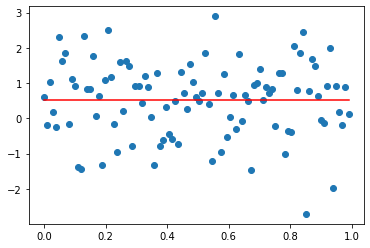

In [51]:
#visualization of brute-force method applied to squared error function with linear approximation
plt.scatter(x, y)
plt.plot(x, Brute_lin[0]*x+Brute_lin[1], 'r')
print('[a,b] =',[Brute_lin[0], Brute_lin[1]])
print(Brute_lin[2])

In [52]:
#determination of rational parameters and the number of iterations (f-calculations)
Brute_rat=bruteforce1(d_rat,x,y)

[a,b] = [0.61, 0.357]
1000000


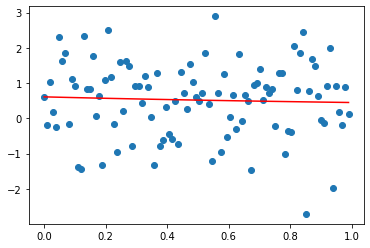

In [53]:
#visualization of brute-force method applied to squared error function with rational approximation
plt.scatter(x, y)
plt.plot(x, Brute_rat[0]/(1+x*Brute_rat[1]), 'r')
print('[a,b] =',[Brute_rat[0], Brute_rat[1]])
print(Brute_rat[2])

In [54]:
#determination of gauss linear parameters and the number of iterations (f-calculations)
(a_gauss_lin,b_gauss_lin,N_gauss_lin_func,N_gauss_lin_it)=gauss1(d_lin,x,y)

[a,b] = [0.0, 0.523]
4000 2


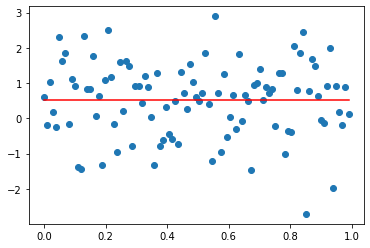

In [55]:
#visualization of gauss method applied to squared error function with linear approximation
plt.scatter(x, y)
plt.plot(x, a_gauss_lin*x+b_gauss_lin, 'r')
print('[a,b] =',[a_gauss_lin, b_gauss_lin])
print(N_gauss_lin_func,N_gauss_lin_it)

In [56]:
#determination of gauss rational parameters and the number of iterations (f-calculations)
(a_gauss_rat,b_gauss_rat,N_gauss_rat_func,N_gauss_rat_it)=gauss1(d_rat,x,y)

[a,b] = [0.612, 0.364]
34000 17


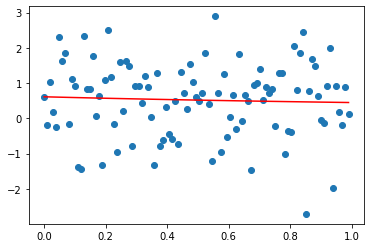

In [57]:
#visualization of gauss method applied to squared error function with rational approximation
plt.scatter(x, y)
plt.plot(x, a_gauss_rat/(1+x*b_gauss_rat), 'r')
print('[a,b] =',[a_gauss_rat, b_gauss_rat])
print(N_gauss_rat_func,N_gauss_rat_it)

Optimization terminated successfully.
         Current function value: 110.332013
         Iterations: 40
         Function evaluations: 76
[a, b] = [-0.13816799  0.59111016]


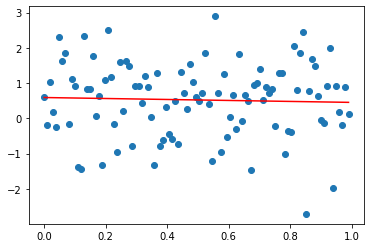

In [38]:
#determination of Nelder-Mead linear parameters and the number of iterations (f-calculations)
result=scipy.optimize.minimize(d_lin_NM,np.array([1,1]),args=(), method='Nelder-Mead',options={'xatol': 0.001,'disp': True})
print ('[a, b] =',result.x)
plt.scatter(x,y)
plt.plot(x, result.x[0] * x + result.x[1], 'r')

Optimization terminated successfully.
         Current function value: 110.307735
         Iterations: 37
         Function evaluations: 72
[a, b] = [0.60972285 0.35606156]


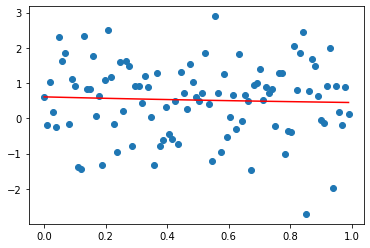

In [39]:
#determination of Nelder-Mead rational parameters and the number of iterations (f-calculations)
result_rat=scipy.optimize.minimize(d_rat_NM,np.array([1,1]),args=(), method='Nelder-Mead',options={'xatol': 0.001,'disp': True})
print ('[a, b] =',result_rat.x)
plt.scatter(x,y)
plt.plot(x, result_rat.x[0]/(1+x*result_rat.x[1]), 'r')

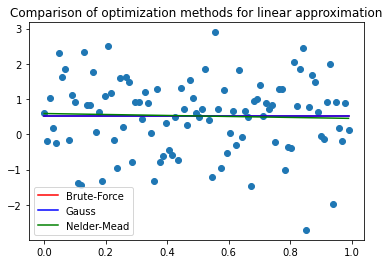

In [45]:
plt.scatter(x,y)
plt.title(label='Comparison of optimization methods for linear approximation')
plt.plot(x, Brute_lin[0]*x+Brute_lin[1], 'r',label='Brute-Force')
plt.plot(x, a_gauss_lin*x+b_gauss_lin, 'b',label='Gauss')
plt.plot(x, result.x[0] * x + result.x[1], 'g',label='Nelder-Mead')
plt.legend()

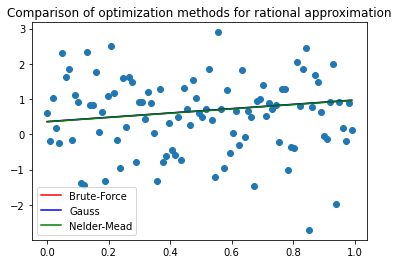

In [46]:
plt.scatter(x,y)
plt.title(label='Comparison of optimization methods for rational approximation')
plt.plot(x, Brute_rat[0]*x+Brute_rat[1], 'r',label='Brute-Force')
plt.plot(x, a_gauss_rat*x+b_gauss_rat, 'b',label='Gauss')
plt.plot(x, result_rat.x[0] * x + result_rat.x[1], 'g',label='Nelder-Mead')
plt.legend()

In [60]:
print(d_lin_NM(result.x))
print(d_lin(x,y,0,0.52))

[110.33201315]
[110.4930174]
